In [1]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read in the dataset
df = pd.read_csv('./data/diabetes_data_upload.csv')

In [3]:
# check dataset
df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [4]:
df.loc[df['Itching'] == 'Yes', ['Gender', 'Age']]

,Gender,Age
0,Male,40
2,Male,41
3,Male,45
4,Male,60
5,Male,55
...,...,...
510,Male,67
511,Male,66
515,Female,39
516,Female,48


In [5]:
dict(df.dtypes)

{'Age': dtype('int64'),
 'Gender': dtype('O'),
 'Polyuria': dtype('O'),
 'Polydipsia': dtype('O'),
 'sudden weight loss': dtype('O'),
 'weakness': dtype('O'),
 'Polyphagia': dtype('O'),
 'Genital thrush': dtype('O'),
 'visual blurring': dtype('O'),
 'Itching': dtype('O'),
 'Irritability': dtype('O'),
 'delayed healing': dtype('O'),
 'partial paresis': dtype('O'),
 'muscle stiffness': dtype('O'),
 'Alopecia': dtype('O'),
 'Obesity': dtype('O'),
 'class': dtype('O')}

In [7]:
from sklearn import preprocessing

In [8]:
possible_values = np.array(['low', 'medium', 'high'])
le1 = preprocessing.LabelEncoder()
le1.fit(possible_values)

LabelEncoder()

In [9]:
le1.classes_

array(['high', 'low', 'medium'], dtype='<U6')

In [10]:
values = np.array(['high', 'low', 'high', 'medium'])

In [11]:
values = le1.transform(values)
print(values)

[0 1 0 2]


In [12]:
le = preprocessing.LabelEncoder()
values = le.fit_transform(values)

In [13]:
values

array([0, 1, 0, 2])

In [14]:
def encode_numerically(df):
    encoders = {}
    is_encodable = np.dtype('O')
    dtypes = dict(df.dtypes)
    for k, v in dtypes.items():
        if v == is_encodable:
            encoders[k] = preprocessing.LabelEncoder()
            df[k] = encoders[k].fit_transform(df[k])
    return encoders

In [15]:
encoders = encode_numerically(df)

In [16]:
encoders

{'Gender': LabelEncoder(),
 'Polyuria': LabelEncoder(),
 'Polydipsia': LabelEncoder(),
 'sudden weight loss': LabelEncoder(),
 'weakness': LabelEncoder(),
 'Polyphagia': LabelEncoder(),
 'Genital thrush': LabelEncoder(),
 'visual blurring': LabelEncoder(),
 'Itching': LabelEncoder(),
 'Irritability': LabelEncoder(),
 'delayed healing': LabelEncoder(),
 'partial paresis': LabelEncoder(),
 'muscle stiffness': LabelEncoder(),
 'Alopecia': LabelEncoder(),
 'Obesity': LabelEncoder(),
 'class': LabelEncoder()}

In [17]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [18]:
data = df.values

In [19]:
X, y = data[:, :-1], data[:, -1]

In [20]:
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, shuffle=True)

In [23]:
clf = tree.DecisionTreeClassifier()

In [24]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

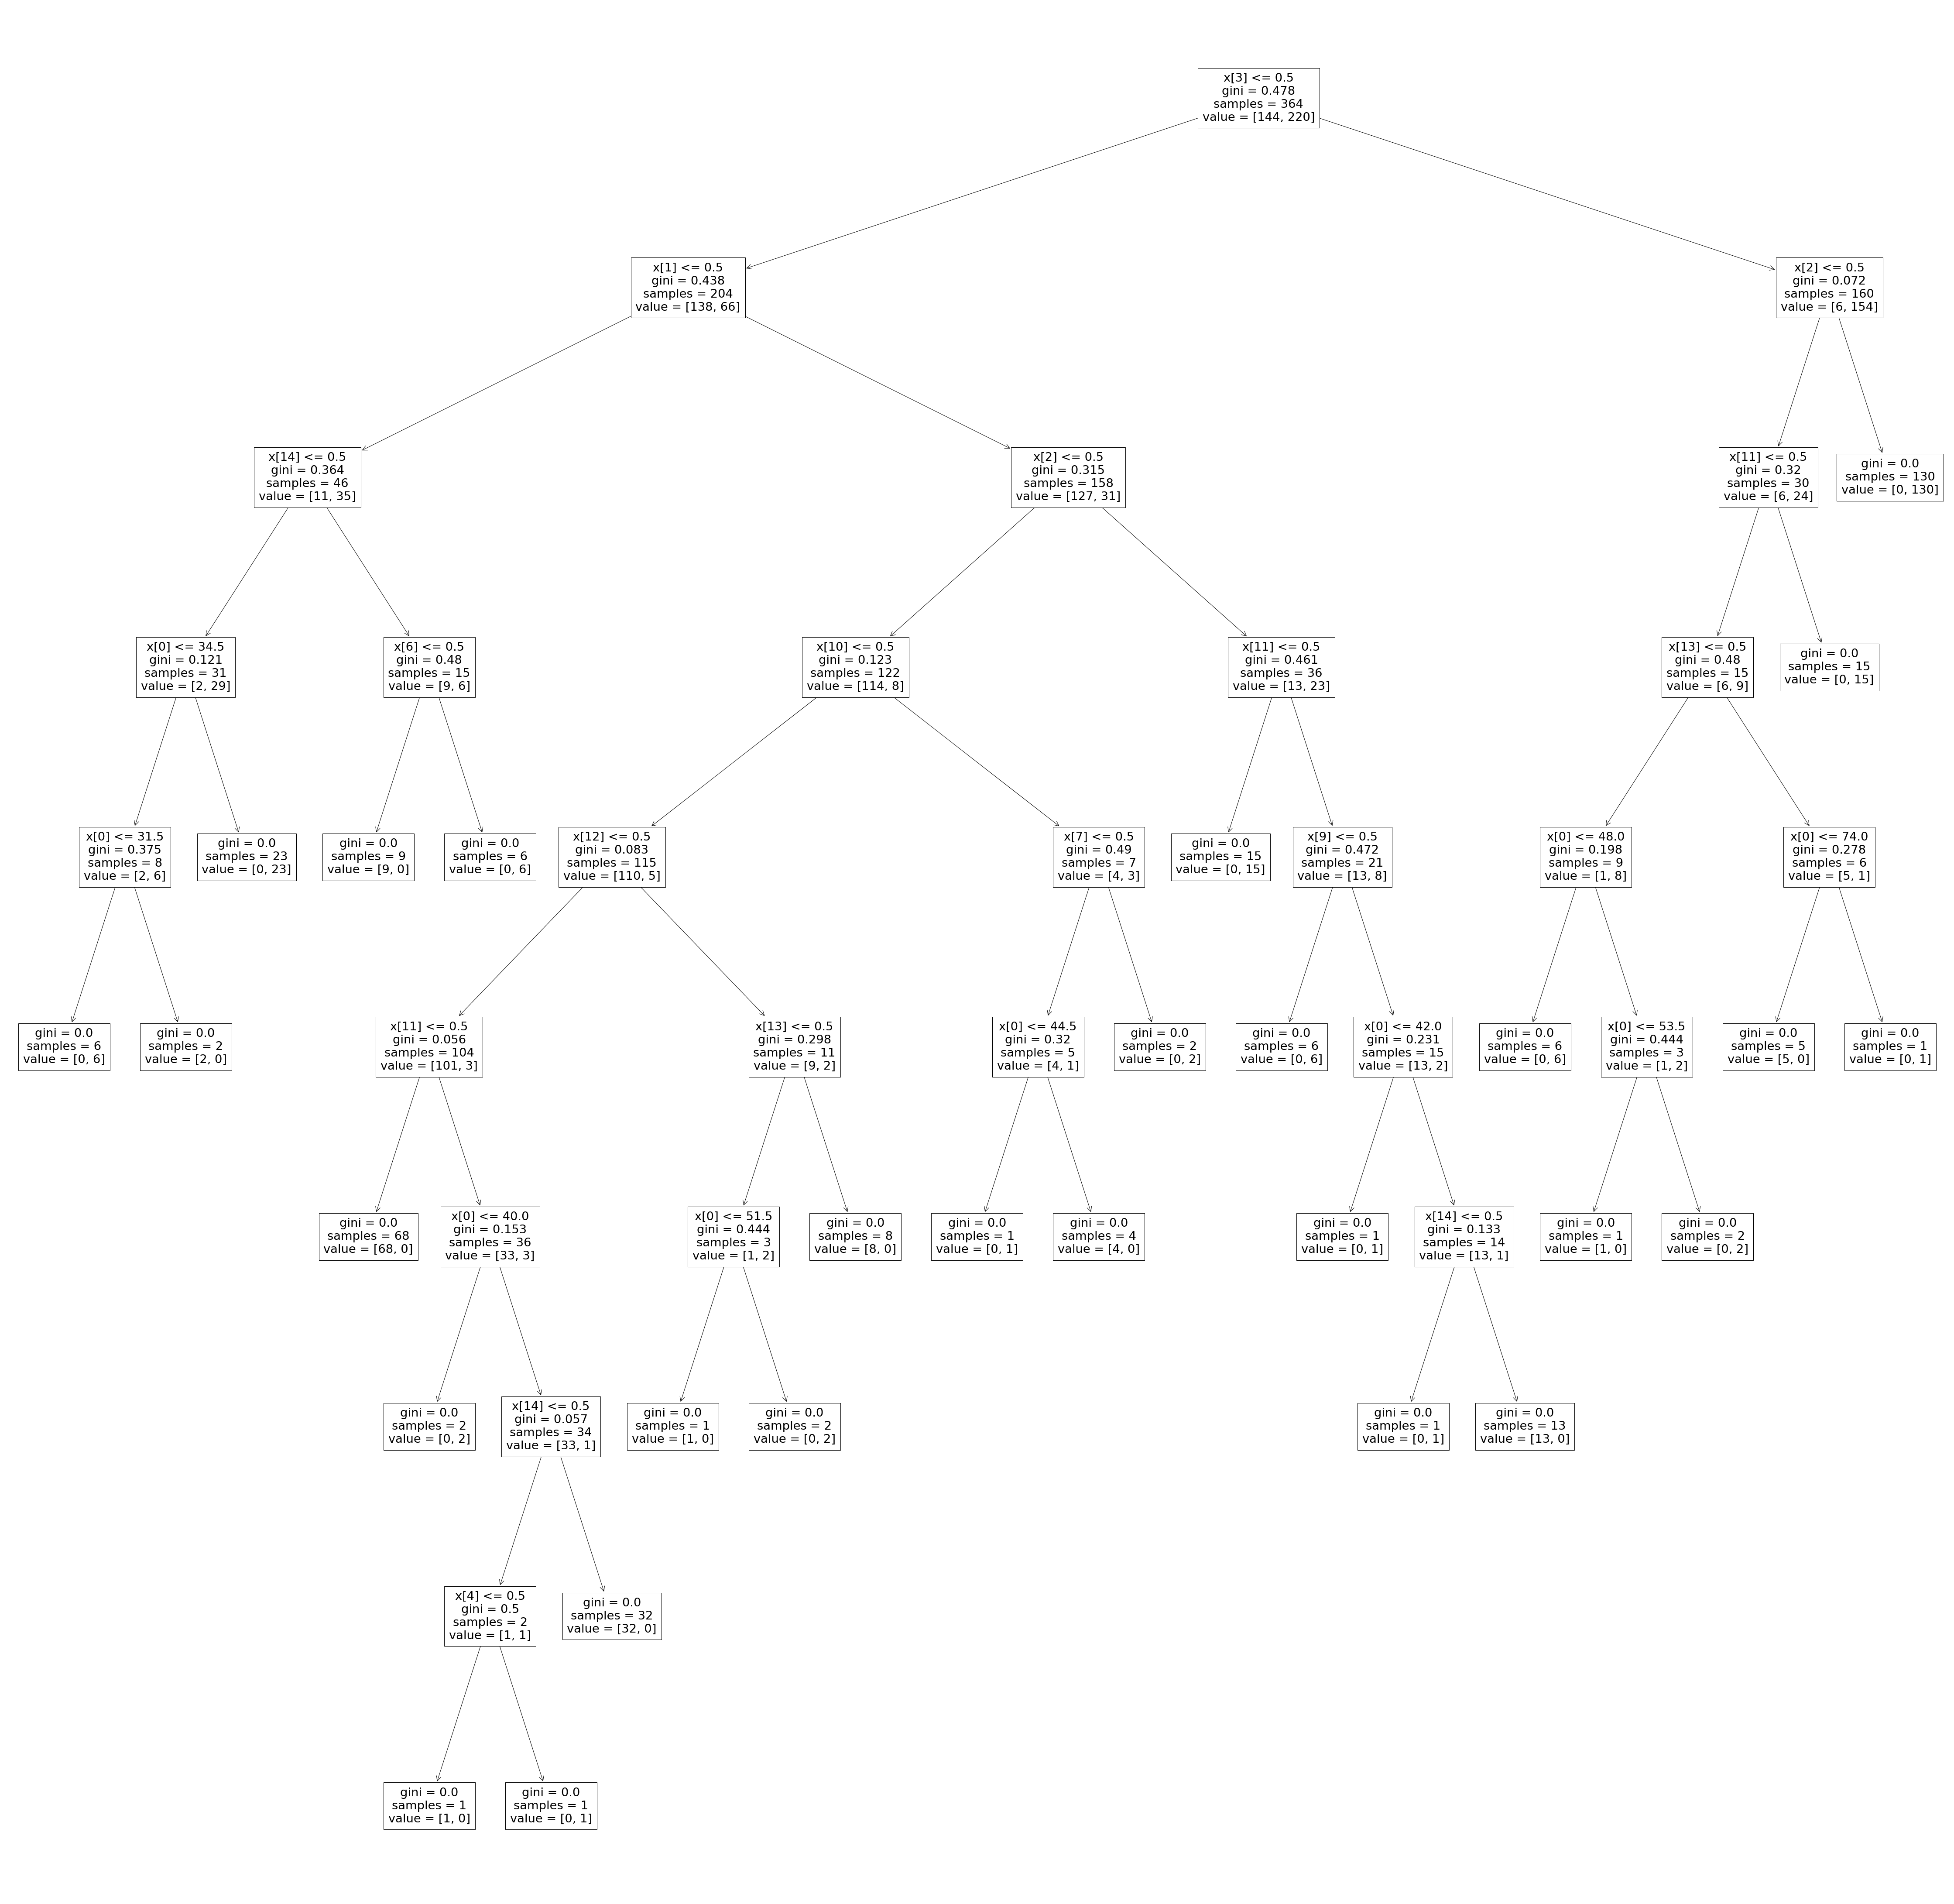

In [25]:
plt.figure(figsize=(80,80))
p = tree.plot_tree(clf)

In [26]:
y_pred = clf.predict(X_test)

In [28]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 51,   5],
       [  0, 100]])

In [29]:
metrics.f1_score(y_test, y_pred)

0.975609756097561

In [28]:
97/(97 + 8)

0.9238095238095239

In [29]:
97/(97 + 3)

0.97

In [30]:
kf = model_selection.KFold(5, shuffle=True)
kf.get_n_splits(X)

5

In [31]:
models = []
f1_scores = []
for train_index, test_index in kf.split(X):
    print(train_index)
    print(test_index)
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = metrics.f1_score(y_test, y_pred)
    f1_scores.append(score)
    models.append(clf)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18
  19  21  22  23  24  25  26  27  29  30  31  32  33  34  35  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  54  55  56  59  60  61  62
  63  65  66  67  68  70  71  72  75  76  77  79  80  81  83  86  88  89
  90  91  92  93  94  95  96  97  99 100 101 102 103 104 106 107 108 109
 111 112 113 115 116 117 118 120 121 122 123 124 125 126 127 129 131 132
 133 134 135 136 137 138 139 140 142 146 147 148 149 151 152 154 156 158
 159 160 162 163 164 165 166 167 168 169 170 172 173 174 175 176 178 179
 183 184 185 187 188 189 190 192 193 194 195 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 213 215 216 217 218 219 220 222 225 227 228
 229 231 232 233 234 235 236 237 238 240 241 242 244 246 248 249 252 253
 254 256 257 258 260 261 262 263 264 265 266 267 268 269 270 271 272 274
 275 279 280 281 282 283 284 285 286 288 289 290 291 292 293 294 296 297
 298 300 301 302 303 304 305 306 307 308 309 310 31

In [32]:
np.mean(f1_scores)

0.9595340876840378

In [33]:
np.std(f1_scores)

0.026009856680224073

In [34]:
from xgboost import XGBClassifier


# declare parameters
params = {
    'objective':'binary:logistic',
    'max_depth': 10,
    'alpha': 10,
    'learning_rate': 1.0,
    'n_estimators':100
}



# instantiate the classifier
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

[19:01:54] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/inzamamrahaman/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
y_pred = xgb_clf.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)
metrics.f1_score(y_test, y_pred)

0.9253731343283583

In [34]:
D = np.array([
    [0, 0, 1, 0, 1],
    [0, 1, 1, 1, 1],
    [0, 2, 0, 1, 0],
    [0, 2, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1],
    [1, 2, 0, 0, 1],
    [1, 1, 0, 1, 1],
    [2, 0, 1, 0, 1],
    [2, 1, 1, 0, 1],
    [2, 1, 0, 1, 1],
    [2, 0, 1, 1, 0],
    [2, 1, 0, 1, 0]
])

In [35]:
D[[0, 1, 4]]

array([[0, 0, 1, 0, 1],
       [0, 1, 1, 1, 1],
       [0, 1, 0, 0, 0]])

In [36]:
D[0][2]

1

In [37]:
D[0, 2]

1

In [38]:
D[0]

array([0, 0, 1, 0, 1])

In [39]:
D[:, 2]

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0])

In [40]:
D[D[:, -1] == 1, 1]

array([0, 1, 0, 1, 2, 1, 0, 1, 1])